# ROC Curves

A ROC (Receiver Operating Characteristic) curve is a method to calculate accuracy of a classification learning algorithm.

The ROC curve is generated by first obtaining the probabilites of the X values for each class. Then, choosing one class at a time, move through probability thresholds and plot the true positve rate and false positive rate.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc

In [2]:
X, y = load_iris(return_X_y=True)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25)

In [3]:
gnb = GaussianNB().fit(train_X, train_y)
y_pred = gnb.predict(test_X)

## Making ROC Curves

In [4]:
def calculate_tpr_and_fpr(y_test, y_pred):
    # Classes predicted correctly
    tpr_and_tnr = y_test == y_pred

    # True positives
    true_positives = y_test[tpr_and_tnr]
    tp = true_positives.sum()
    tn = true_positives.shape[0] - tp

    # False negatives
    false_negatives = y_test[~tpr_and_tnr]
    fn = false_negatives.sum()
    fp = false_negatives.shape[0] - fn

    tpr = tp / (tp + fn) # sensitivity
    fpr = fp / (fp + tn) # 1 - specificity
    
    return tpr, fpr

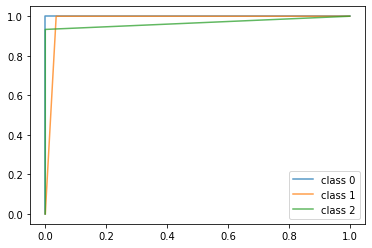

In [5]:
probabilities = gnb.predict_proba(test_X)
probability_thresholds = np.linspace(0,1,num=10)

for cls in np.unique(test_y):
    # Only select the class we're plotting a ROC curve for
    class_probabilities = probabilities[:,cls]
    
    fprs_and_tprs = []
    for probability_threshold in probability_thresholds:
        # Slowly moving along the probabilities scale
        preds = class_probabilities > probability_threshold
        
        tpr, fpr = calculate_tpr_and_fpr(test_y == cls, preds)
        fprs_and_tprs.append((fpr, tpr))
        
    plt.plot(*zip(*fprs_and_tprs), label=f"class {cls}", alpha=0.75)
plt.legend()